# Ислледование продаж интернет-магазина компьютерных игр "Стримчик"

**Описание исследования**<br>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель исследования**<br>
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи исследования**<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Исходные данные**<br>
Путь к файлу: /datasets/games.csv

Name — название игры <br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

***План работы:***

1. Открыть файл с данными и изучите общую информацию<br>
2. Подготовить данные<br>
    2.1. Заменить названия столбцов<br>
    2.2. Преобразуйте данные в нужные типы<br>
    2.3. Обработайте пропуски при необходимости<br>
    2.4. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец<br>
3. Провести исследовательский анализ данных<br>
    3.1. Посмотреть, сколько игр выпускалось в разные годы<br>
    3.2. Посмотреть, как менялись продажи по платформам<br>
    3.3. Взять данные за соответствующий актуальный период<br>
    3.4. Выбрать несколько потенциально прибыльных платформ<br>
    3.5. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам<br>
    3.6. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков<br>
    3.7. Посмотреть на общее распределение игр по жанрам<br>
4. Составить портрет пользователя каждого региона<br>
    4.1. Определите для пользователя каждого региона самые популярные платформы (топ-5)<br>
    4.2. Самые популярные жанры (топ-5)<br>
    4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?<br>
5. Проверить гипотезы<br>
    5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
    5.2. Средние пользовательские рейтинги жанров Action и Sports разные<br>
6. Написать общий вывод<br>

### Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
import os
pth1 = '/datasets/games.csv'
pth2 = 'datasets/games.csv'
if os.path.exists(pth1):
    games = pd.read_csv(pth1)
elif os.path.exists(pth2):
    games = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")
    
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем основную информацию о датафрейме.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Перед предобработкой данных сохраним данные о количестве строк в изначальном датафрейме с целью проследить, чтобы количество удаленных данных не превысило 10%.

In [5]:
rows_orig = games.shape[0]
rows_orig 

16715

### Подготовка данных

#### Приведем названия столбцов к нижнему регистру

In [6]:
games_columns_list = list(games.columns)

for i in range(len(games_columns_list)):
   games_columns_list[i] = games_columns_list[i].lower()
   
games.columns = games_columns_list
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Рассмотрим наличие явных дубликатов в данных

In [7]:
games.duplicated().sum()

0

Изучим налиичие неявных дубликатов в таблице. Таковыми будут являться строчки с одинаковыми значениями в столбцах 'name', 'platform', 'year_of_release'.

In [8]:
games[games.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Таких строчек вссего две. Их можем удалить.

In [9]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

#### Обработаем пропуски в столбцах

Рассмотрим пропуски в столбцах 'name', 'year_of_release', 'genre'.

In [10]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [11]:
games[games['year_of_release'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [12]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Пропуски в столбцах 'name' и 'genre' есть только у одной игры. Пропуски в столбце 'year_of_relese' имеют даже популярные игры.

Строки с пропусками в стобце с названием игры и года её релиза удалим, таких строк немного. Пропуски в этих столбцах могли возникнуть из-за некорректных предоставленных данных со стороны производителя, либо же из-за сбоя системы.

In [13]:
games = games.dropna(subset=['name','year_of_release'])

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Рассмотрим значения в столбце с оценкой пользователей.

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение 'tbd' расшифровывается как To Be Determined - будет определено. Данное значение следует также рассматривать как пропуск. Пропуски в столбцах с оценками заменим на число -1. <br>
Пропуски в столбце 'rating' заменим строкой 'no_data'

In [16]:
#columns_to_change = ['critic_score', 'user_score', 'rating']
columns_to_change = ['critic_score', 'user_score']
games[columns_to_change] = games[columns_to_change].replace('tbd', -1).fillna(-1)

games['rating'] = games['rating'].fillna('no_data')

In [17]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,no_data
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,no_data


#### Преобразуем типы данных в столбцах

Заменим типы данных в столбцах 'year_of_release' и 'critic_score' на int, потому что значения в этих столбцах - целочисленные. Тип столбца 'user_score' заменим на вещественный.

In [18]:
games[['year_of_release', 'critic_score']] = games[['year_of_release', 'critic_score']].astype(int)
games['user_score'] = pd.to_numeric(games['user_score'])

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


#### Посчитаем суммарные продажи во всех регионах

Запишем данные о суммарных продажах в отдельный столбец.

In [20]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no_data,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no_data,31.38


Посмотрим, какое количество данных осталось после предобработки.

In [21]:
round(games.shape[0] / rows_orig, 2)

0.98

Удалено было всего лишь 2%.

Пропуски в данных могли возникнуть из-за разных причин в зависимости от столбца, где обнаружен пропуск. Так, в столбцах 'name', 'year_of_release' и 'platform' пропуски могли возникнуть из-за ошибки в заполнении данных. В столбце 'rating' пропуски имеют игры, выпущенные не в Северной Америке, поскольку ESRB - рейтинг для США и Канады.

***Вывод по проведённой предобработке данных:***

При предобработке данных названия столбцов были переведены в нижний регистр. 

Обработаны пропуски в таблице:
- Строки с пропусками в столбцах 'year_of_release' и 'name' были удалены
- Пропуски в столбцах 'user_score', 'critic_score' были заменены на -1
- Пропуски в столбце 'rating' заменены на 'na_data'
- Значения tbd в столбце 'user_score' заменены на -1

Пропуски в столбцах 'name', 'year_of_release' и 'platform' могли возникнуть из-за ошибки в заполнении данных. В 'rating' пропуски имеют игры, выпущенные не в Северной Америке, поскольку ESRB - рейтинг для США и Канады.

Явных дубликатов не обнаружно. Удалены строки с одинаковыми занчениями в столбцах 'name', 'year_of_rlease' и 'platform'.

Изменены типы данных в следующих столбцах:
- Типы данных в столбцах 'year_of_release' и 'critic_score' заменены на int
- Тип столбца 'user_score' заменен на вещественный
- Данные о суммарных продажах были записаны в отдельный столбец 'total_sales'.

Во время предобработки было удавлено не более 2% от всех данных.

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

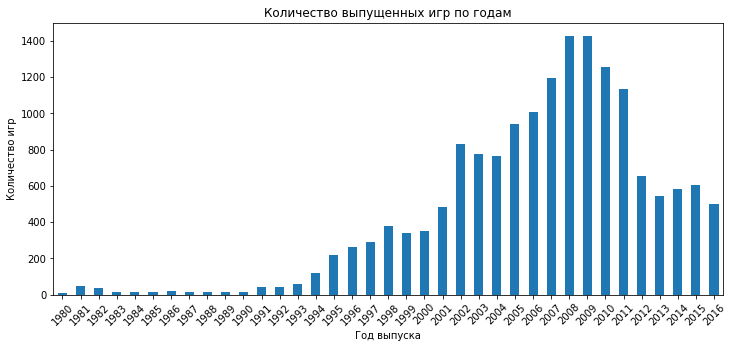

In [23]:
plt.figure(figsize = (12, 5))
games['year_of_release'].value_counts(sort=False).sort_index().plot.bar()
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.title('Количество выпущенных игр по годам')
plt.show()

Для дальнейшего исследовательского анализа данные ранее 2012 года не важны, поскольку уже устарели и не являются актуальными.

#### Посмотрим, как менялись продажи по платформам

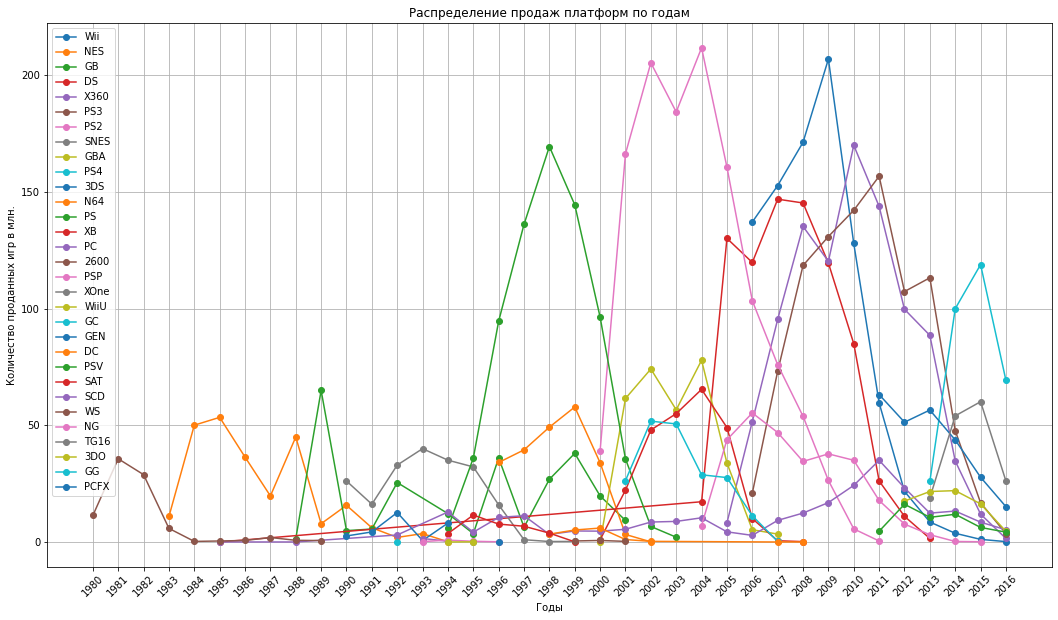

In [24]:
games_actual = games.copy()

plt.figure(figsize = (18, 10))
for platform in games_actual['platform'].unique():
    platform_pivot_table = games_actual.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    ax = plt.plot(platform_pivot_table.index, platform_pivot_table.values, "-o", label=platform)
plt.grid()
plt.xticks(range(1980, 2017)) 
plt.xlabel('Годы')
plt.ylabel('Количество проданных игр в млн.')
plt.title('Распределение продаж платформ по годам')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [25]:
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

В среднем на каждой платформе новые игры выпускаются и продаются в течение 7 лет после создания платформы.

***Промежуточные выводы:***<br>
1. Изучено распрделение игр по годам выпуска и составлен соотвествующий график. Определено, что для дальнейшего анализа данные за период до 2012 года не важны, поскольку устарели и больше не являются актуальными для нас.
2. Исследовано, как менялись продажи по всем платформам за весь период. Составлен соотвестующий график.
3. Вычислено, что медианное время жизни одной платформы составляет 7 лет. 

В качестве актуального периода выберем промежуток с 2013 по 2016 год.

In [26]:
games_actual = games_actual.query('year_of_release >= 2013')

Выберем платформы с наибольшими суммарными продажами.

In [27]:
top_sales_platforms = games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top_sales_platforms_sorted = top_sales_platforms.sort_values(by='total_sales', ascending=False)
top_sales_platforms_sorted

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Выберем первые 10 платформ и пострим распределения по ним.

In [28]:
top_platforms = top_sales_platforms_sorted.index.tolist()[:10]
top_platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP']

Выведем график продаж для этого периода.

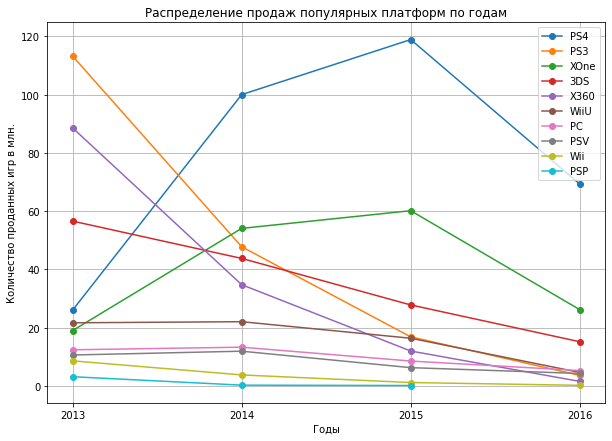

In [29]:
games_actual = games_actual.query('platform in @top_platforms')
plt.figure(figsize = (10, 7))
for platform in top_platforms:
    platform_pivot_table = (games_actual
                            .query('platform == @platform')
                            .pivot_table(index='year_of_release', 
                                         values='total_sales', 
                                         aggfunc='sum')
                           )
    ax = plt.plot(platform_pivot_table.index, platform_pivot_table.values, "-o", label=platform)
    
plt.grid()
plt.xticks(range(2013, 2017)) 
plt.xlabel('Годы')
plt.ylabel('Количество проданных игр в млн.')
plt.title('Распределение продаж популярных платформ по годам')
plt.legend()
plt.show()

Среди платформ лидируют PS4 и Xbox One. У всех платформ, кроме PS4 и Xbox One, начиная с 2013 года наблюдается постепенное снижение продаж. У PS4 и XOne продажи росли до 2015 года, про 2016 год трудно сказать, поскольку данные за этот год могут быть неполными. Потенциально прибыльными можно посчитать платформы PS4 и XOne.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

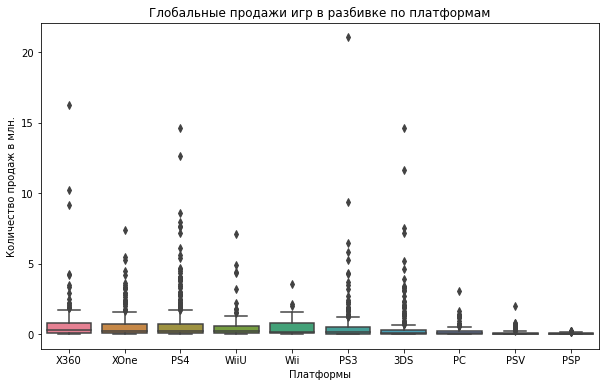

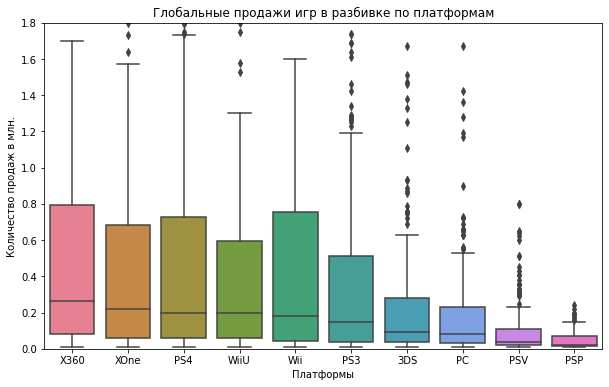

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', 
            y='total_sales', 
            data=games_actual, 
            palette='husl',
            order=(games_actual
                   .groupby('platform')['total_sales']
                   .agg('median')
                   .sort_values(ascending=False)
                   .index)
           )
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж в млн.')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', 
            y='total_sales', 
            data=games_actual, 
            palette='husl',
            order=(games_actual
                   .groupby('platform')['total_sales']
                   .agg('median')
                   .sort_values(ascending=False)
                   .index)
           )
plt.ylim(0,1.8)
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж в млн.')
plt.show()

Судя по графику, можно сказать, что игры, выпущенные на платформах X360, PS4, Wii и XOne имеют наибольшие медианные значения количества глобальных продаж и наибольший межквартильный размах. Это значит, игра, выпущенная на одной из этих платформ, скорее всего будет иметь большее количество продаж по миру, чем игра, выпущенная на другой платформе. 

Также теперь можно заметить, что наиболее "выстрелившие" игры за актуальный период были выпущены на платформах PS3, 3DS, X360 и PS4.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Построим график рассеяния, чтобы посмотреть зависимость продаж платформы PS4 от оценок пользователей. Также выведем корреляцию между этими величинами.

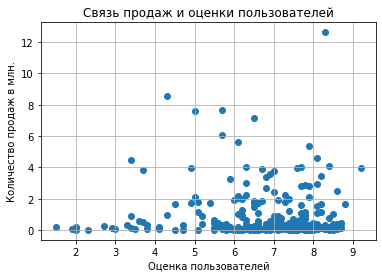

In [31]:
plt.scatter(x='user_score', y='total_sales', data=games_actual.query('platform == "PS4" and user_score > -1'))
plt.grid()
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж в млн.')
plt.title('Связь продаж и оценки пользователей')
plt.show()

In [32]:
# games_actual.query('platform == "PS4"')['user_score'].corr(games_actual.query('platform == "PS4"')['total_sales'])
games_actual.query('platform == "PS4" and user_score > -1')['user_score'].corr(games_actual.query('platform == "PS4" and user_score > -1')['total_sales'])

-0.031957110204556376

Связи между продажами игры и оценками пользователей не наблюдается.

Построим график рассеяния, чтобы посмотреть зависимость продаж платформы PS4 от оценок критиков. Также выведем корреляцию между этими величинами.

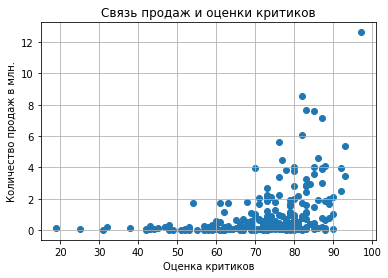

In [33]:
# plt.scatter(x='critic_score', y='total_sales', data=games_actual.query('platform == "PS4" and user_score > -1'))
plt.scatter(x='critic_score', y='total_sales', data=games_actual.query('platform == "PS4" and critic_score > -1'))
plt.grid()
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж в млн.')
plt.title('Связь продаж и оценки критиков')
plt.show()

In [34]:
# games_actual.query('platform == "PS4"')['critic_score'].corr(games_actual.query('platform == "PS4"')['total_sales'])

games_actual.query('platform == "PS4" and critic_score > -1')['critic_score'].corr(games_actual.query('platform == "PS4" and critic_score > -1')['total_sales'])

0.40656790206178095

Между продажами игры и оценками критиков наблюдается слабая связь. Можно отметить, что игры, у которых было продано более 2 миллионов копий, обычно имеют оценку критиков не менее 70 баллов из 100, но не наоборот. Также можно заметить, что у игр, получивших менее 50 баллов от критиков, количество продаж заметно меньше 1 миллиона.

#### Соотнесём выводы с продажами игр на других платформах

Для этого построим диаграммы рассеяния и посчитаем корреляции для трёх других платформ.

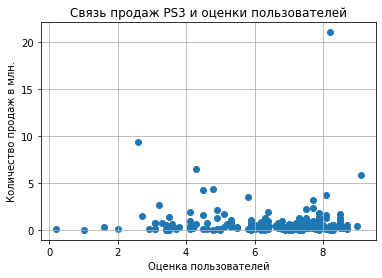

Корреляция между оценкой пользователей и продажами PS3: 0.0023944027357566925


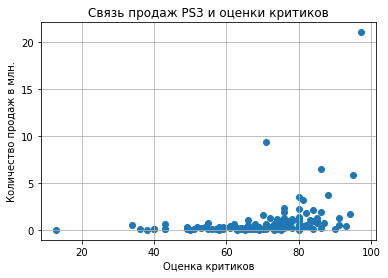

Корреляция между оценкой критиков и продажами PS3: 0.3342853393371919





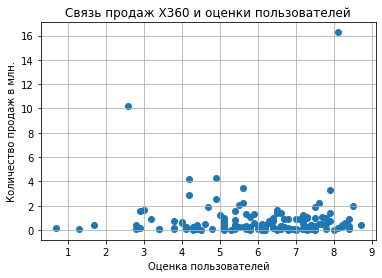

Корреляция между оценкой пользователей и продажами X360: -0.011742185147181342


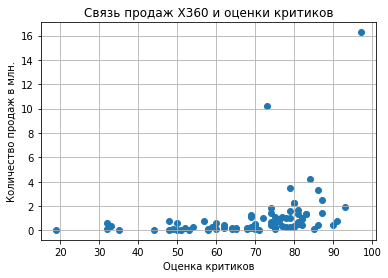

Корреляция между оценкой критиков и продажами X360: 0.3503445460228664





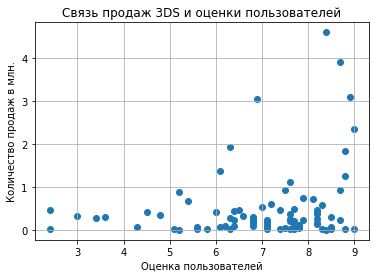

Корреляция между оценкой пользователей и продажами 3DS: 0.24150411773563016


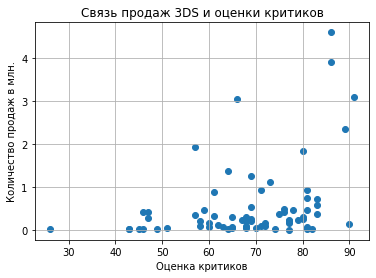

Корреляция между оценкой критиков и продажами 3DS: 0.3570566142288103





In [35]:
platforms = ['PS3', 'X360', '3DS']
for platform in platforms:
    actual_platform = games_actual.query('platform == @platform and user_score > -1')
    plt.scatter(x='user_score', y='total_sales', data=actual_platform)
    plt.grid()
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Количество продаж в млн.')
    plt.title(f'Связь продаж {platform} и оценки пользователей')
    plt.show()
    
    sales_user_score_corr = actual_platform['user_score'].corr(actual_platform['total_sales'])
    print(f'Корреляция между оценкой пользователей и продажами {platform}: {sales_user_score_corr}')
    
    actual_platform = games_actual.query('platform == @platform and critic_score > -1')
    plt.scatter(x='critic_score', y='total_sales', data=actual_platform)
    plt.grid()
    plt.xlabel('Оценка критиков')
    plt.ylabel('Количество продаж в млн.')
    plt.title(f'Связь продаж {platform} и оценки критиков')
    plt.show()
    
    sales_critic_score_corr = actual_platform['critic_score'].corr(actual_platform['total_sales'])
    print(f'Корреляция между оценкой критиков и продажами {platform}: {sales_critic_score_corr}')
    print('\n\n')


Полученные графики и величины корреляции согласуются с предыдущими наблюдениями.

####  Посмотрим на общее распределение игр по жанрам

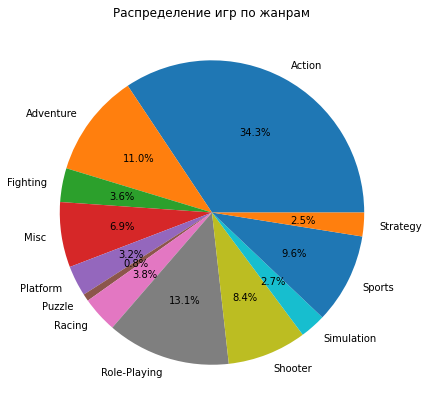

In [36]:
genre_distribution = games_actual.pivot_table(index='genre', values='total_sales', aggfunc='count')
plot = genre_distribution.plot.pie(y='total_sales', figsize=(7, 7), autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Распределение игр по жанрам')
plt.legend('', frameon=False)
plt.show()

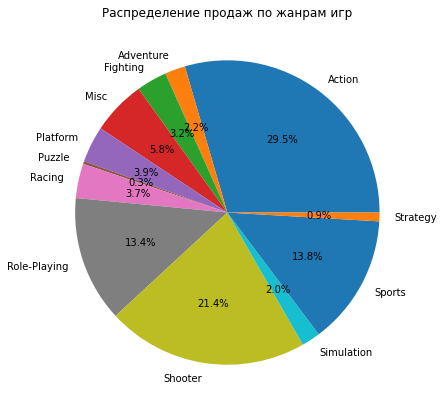

In [37]:
genre_distribution = games_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum')
plot = genre_distribution.plot.pie(y='total_sales', figsize=(7, 7), autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Распределение продаж по жанрам игр')
plt.legend('', frameon=False)
plt.show()

Наиболее частыми и популярными жанрами игр являются action, role-playing, sports и shooter. <br>
Можно отметить, что доля игр жанра shooter от всех выпущенных игр за актуальный период составляет 8.4%, в то время как доля проданных копий игр этого жанра составляет уже 21.4% - очевидно, жанр популярен среди пользователей. С играми жанра adventure ситуация противоположная: игры этого жанра занимают 11% от всех выпущенных игр, но доля от продаж - всего лишь 2.2%.

Сравним медианные продажи и построим соотвествующие диаграммы размаха, чтобы определить наиболее стабильные прибыльные жанры среди пользователей.

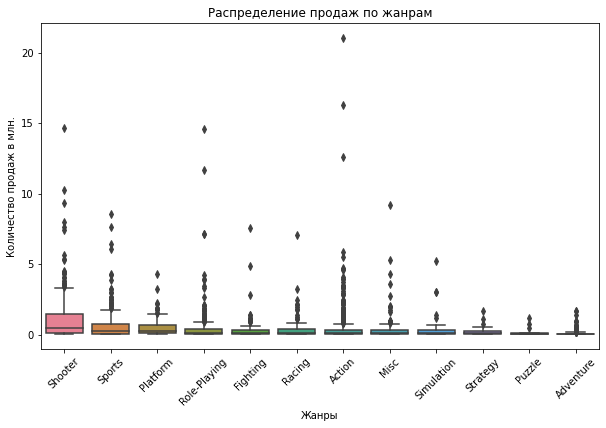

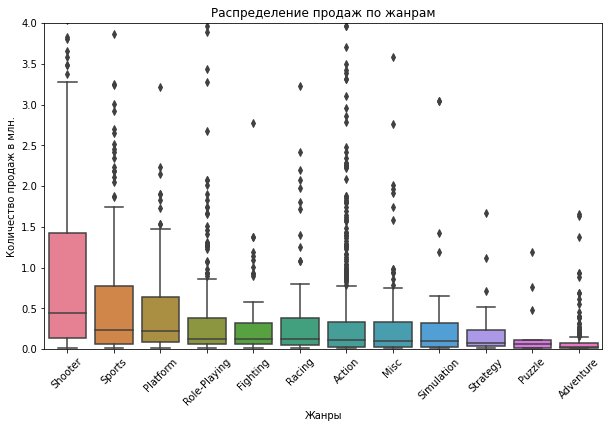

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', 
            y='total_sales', 
            data=games_actual, 
            palette='husl',
            order=(games_actual
                   .groupby('genre')['total_sales']
                   .agg('median')
                   .sort_values(ascending=False)
                   .index)
           )
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество продаж в млн.')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', 
            y='total_sales', 
            data=games_actual, 
            palette='husl',
            order=(games_actual
                   .groupby('genre')['total_sales']
                   .agg('median')
                   .sort_values(ascending=False)
                   .index)
           )
plt.ylim(0, 4)
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество продаж в млн.')
plt.xticks(rotation=45)
plt.show()

Максимальные продажи имеют игры жанра 'Action', 'Role-Playing' и 'Shooter', однако наиболее стабильный спрос наблюдается на игры жанра 'Shooter', 'Sports', 'Platform': медианные продажи игр из этих жанров выше остальных. Значит, доход от игр жанров 'Shooter', 'Sports', 'Platform' стабильнее, чем от игр жанров 'Action', 'Role-Playing'.

### Составим портрет пользователя каждого региона

#### Найдем самые популярные платформы в каждом регионе

Напишем функцию, которая позволит найти топ-5 платформ для каждого региона.

In [39]:
def popular_platforms(df, region):
    top_platforms = df.pivot_table(index='platform', values=region, aggfunc='sum')
    top_platforms = top_platforms.sort_values(by=region, ascending=False)
    top_five = top_platforms.index.tolist()[:5]
    print(f'Самые популярные плафтормы в {region.split("_")[0].upper()}: {top_five}')

In [40]:
for region in ['eu_sales', 'jp_sales', 'na_sales']:
    popular_platforms(games_actual, region)

Самые популярные плафтормы в EU: ['PS4', 'PS3', 'XOne', 'X360', '3DS']
Самые популярные плафтормы в JP: ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']
Самые популярные плафтормы в NA: ['PS4', 'XOne', 'X360', 'PS3', '3DS']


Добавим столбцы, в которых категоризируем плафтормы по каждому региону: если название платформы не входит в топ-5 по своему региону, то в столбец записывается "Другое", если входит - копируется название. 

In [41]:
def eu_top_platforms_category(df):
    if df['platform'] in ['PS4', 'PS3', 'XOne', 'X360', '3DS']:
        return df['platform']
    else:
        return 'Другое'
    
def jp_top_platforms_category(df):
    if df['platform'] in ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']:
        return df['platform']
    else:
        return 'Другое'

def na_top_platforms_category(df):
    if df['platform'] in ['PS4', 'XOne', 'X360', 'PS3', '3DS']:
        return df['platform']
    else:
        return 'Другое'

In [42]:
games_actual['eu_top_platforms'] = games_actual.apply(eu_top_platforms_category, axis=1)
games_actual['jp_top_platforms'] = games_actual.apply(jp_top_platforms_category, axis=1)
games_actual['na_top_platforms'] = games_actual.apply(na_top_platforms_category, axis=1)

In [43]:
games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,eu_top_platforms,jp_top_platforms,na_top_platforms
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,PS3,PS3,PS3
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,X360,Другое,X360
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,no_data,14.63,PS4,PS4,PS4
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,no_data,14.60,3DS,3DS,3DS
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,PS4,PS4,PS4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no_data,0.01,Другое,PSV,Другое
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,no_data,0.01,Другое,PSV,Другое
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,no_data,0.01,PS3,PS3,PS3
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no_data,0.01,Другое,PSV,Другое


Теперь можно вывести круговые диаграммы по каждому региону.

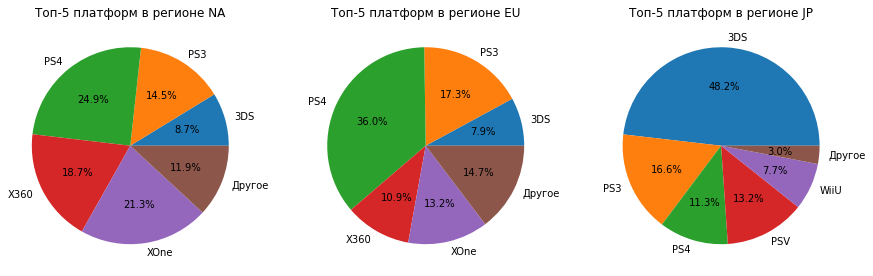

In [44]:
fig, axs = plt.subplots(nrows= 1, ncols= 3, figsize=(15, 15))
col = 0
for column in ['na_top_platforms', 'eu_top_platforms', 'jp_top_platforms']:
    platforms_distribution = games_actual.pivot_table(index=column, values=column.split("_")[0]+'_sales', aggfunc='sum')
    axs[col].pie(platforms_distribution[column.split("_")[0]+'_sales'], labels=platforms_distribution.index, autopct='%1.1f%%', )
    axs[col].set_title('Топ-5 платформ в регионе '+column.split("_")[0].upper())
    col +=1
plt.show()

Топ-5 платформ в Северной Америке и Европе совпадают (PS4, PS3, XOne, X360, 3DS) и в обоих регионах самой популярной платформой явялется PS4. Распределение платформ в Японии принципиально отчается: самой популярной здесь является 3DS, почти половина (48.2%) купленных там игр было выпущено на этой платформе. В относительно равных долях находятся PS3, PS4 и  PSV.

#### Определим топ-5 жанров в каждом регионе

Таким же образом, как и в предыдущем пункте, определим необходимые функции, проведём категоризацию и выведем круговые диаграммы.

In [45]:
def popular_genres(df, region):
    top_genres = df.pivot_table(index='genre', values=region, aggfunc='sum')
    top_genres = top_genres.sort_values(by=region, ascending=False)
    top_five = top_genres.index.tolist()[:5]
    print(f'Самые популярные жанры в {region.split("_")[0].upper()}: {top_five}')

In [46]:
for region in ['eu_sales', 'jp_sales', 'na_sales']:
    popular_genres(games_actual, region)

Самые популярные жанры в EU: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
Самые популярные жанры в JP: ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']
Самые популярные жанры в NA: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


In [47]:
def eu_top_genres_category(df):
    if df['genre'] in ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']:
        return df['genre']
    else:
        return 'Другое'
    
def jp_top_genres_category(df):
    if df['genre'] in ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']:
        return df['genre']
    else:
        return 'Другое'

def na_top_genres_category(df):
    if df['genre'] in ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']:
        return df['genre']
    else:
        return 'Другое'

In [48]:
games_actual['eu_top_genres'] = games_actual.apply(eu_top_genres_category, axis=1)
games_actual['jp_top_genres'] = games_actual.apply(jp_top_genres_category, axis=1)
games_actual['na_top_genres'] = games_actual.apply(na_top_genres_category, axis=1)

In [49]:
games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,eu_top_platforms,jp_top_platforms,na_top_platforms,eu_top_genres,jp_top_genres,na_top_genres
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,PS3,PS3,PS3,Action,Action,Action
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,X360,Другое,X360,Action,Action,Action
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,no_data,14.63,PS4,PS4,PS4,Shooter,Shooter,Shooter
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,no_data,14.60,3DS,3DS,3DS,Role-Playing,Role-Playing,Role-Playing
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,PS4,PS4,PS4,Action,Action,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no_data,0.01,Другое,PSV,Другое,Другое,Другое,Другое
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,no_data,0.01,Другое,PSV,Другое,Другое,Misc,Misc
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,no_data,0.01,PS3,PS3,PS3,Action,Action,Action
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no_data,0.01,Другое,PSV,Другое,Другое,Другое,Другое


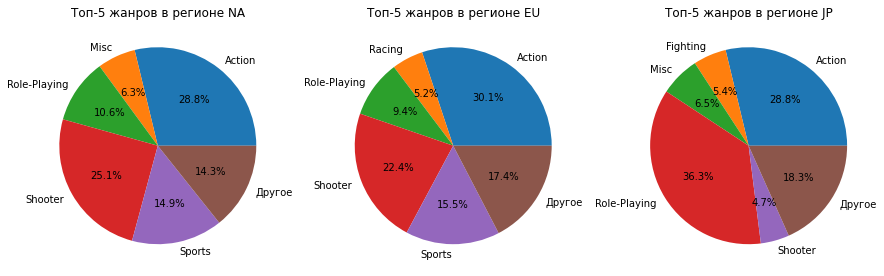

In [50]:
fig, axs = plt.subplots(nrows= 1, ncols= 3, figsize=(15, 15))
col = 0
for column in ['na_top_genres', 'eu_top_genres', 'jp_top_genres']:
    genres_distribution = games_actual.pivot_table(index=column, values=column.split("_")[0]+'_sales', aggfunc='sum')
    axs[col].pie(genres_distribution[column.split("_")[0]+'_sales'], labels=genres_distribution.index, autopct='%1.1f%%', )
    axs[col].set_title('Топ-5 жанров в регионе '+column.split("_")[0].upper())
    col +=1
plt.show()

Как и в ситуации с платформами, распределение жанров в Европе и Северной Америке схожи: самые популярные жанры - Action, Shooter. Среди же японских пользователей особой популярностью помимо Action(28.8%) пользуется Role-Playing(36.3%).

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

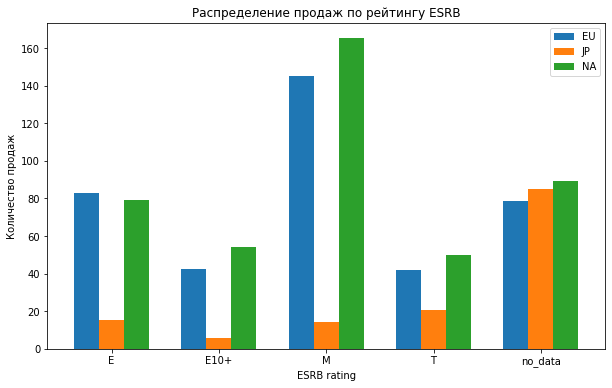

In [51]:
esrb_table = games_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
esrb_table.columns=['EU', 'JP', 'NA']
esrb_table.plot.bar(figsize=(10, 6), width=0.7)
plt.xticks(rotation=0)
plt.xlabel('ESRB rating')
plt.ylabel('Количество продаж')
plt.title('Распределение продаж по рейтингу ESRB')
plt.show()

В Европе и Северной Америке наибольшим спросом пользуются игры, имеющие рейтинг "M", за ним следуют игры с рйтингом "E", а также игры, не имеющие рейтинга от ESRB. Наименьший спрос наблюдается на игры с рейтингом "E10+" и "T". <br>
В Японии наибольшую популярность имеют игры без рейтинга от ESRB.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки данной гипотезы воспользуемся t-тестом и сравним рейтинги платформ Xbox One и PC.<br>
Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.<br>
Альтернативная гипотеза: они не равны.

In [52]:
alpha = 0.5
result = st.ttest_ind(games_actual.query('platform == "XOne" and user_score > -1')['user_score'], games_actual.query('platform == "PC" and user_score > -1')['user_score'], alternative='two-sided')
print(f'p-value: {result.pvalue:.3f}')

xone_score_mean = games_actual.query('platform == "XOne" and user_score > -1')['user_score'].mean()
print(f'Средняя оценка пользователей платформы XOne: {xone_score_mean}')
pc_score_mean = games_actual.query('platform == "PC" and user_score > -1')['user_score'].mean()
print(f'Средняя оценка пользователей платформы PC: {pc_score_mean}')

if result.pvalue < 0.05:
    print('Нулевая гипотеза отвергается: средние пользовательские рейтинги платформ Xbox One и PC не равны')
else: 
    print('Не удалось опровергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC')

p-value: 0.140
Средняя оценка пользователей платформы XOne: 6.521428571428572
Средняя оценка пользователей платформы PC: 6.2696774193548395
Не удалось опровергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC


#### Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки данной гипотезы воспользуемся t-тестом и сравним рейтинги жанров Action и Sports разные.<br>
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.<br>
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [53]:
alpha = 0.5
result = st.ttest_ind(games_actual.query('genre == "Action" and user_score > -1')['user_score'], games_actual.query('genre == "Sports" and user_score > -1')['user_score'], alternative='two-sided')
print(f'p-value: {result.pvalue}')

action_score_mean = games_actual.query('genre == "Action" and user_score > -1')['user_score'].mean()
print(f'Средняя оценка пользователей жанра Action: {action_score_mean}')
sports_score_mean = games_actual.query('genre == "Sports" and user_score > -1')['user_score'].mean()
print(f'Средняя оценка пользователей жанра Sports: {sports_score_mean}')

if result.pvalue < 0.05:
    print('Нулевая гипотеза отвергается: средние пользовательские рейтинги жанров Action и Sports разные')
else: 
    print('Не удалось опровергнуть гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports')

p-value: 7.102366533466476e-28
Средняя оценка пользователей жанра Action: 6.842783505154639
Средняя оценка пользователей жанра Sports: 5.238124999999999
Нулевая гипотеза отвергается: средние пользовательские рейтинги жанров Action и Sports разные


Для проверки утверждений о одинаковости/разности пользовательских оценок следует формулировать нулевую гипотезу, где предполагается равенство средних двух выборок: выборки, составленной из рейтингов пользователей первой плфтормы/жанра, и выборки, составленной из рейтингов пользователей второй плфтормы/жанра. В качестве альтернативной гипотезы берётся гипотеза об их неравенстве. 
<br>Для проверки гипотез можно применить статистический двусторонний t-тест, поскольку выборки независимы между собой и количество значений в обоих выборках выше 30.

### Вывод

В ходе выполнения проекта были исследованы продажи интернет-магазина компьютерных игр "Стримчик" с целью нахождения закономерностей, определяющих успешность игры. Это позволит определить потенциально популярные игры и построить рекламную кампанию на 2017 год. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы - они представлены в файле `games.csv`.

При предобработке данных названия столбцов были переведены в нижний регистр. 

Обработаны пропуски в таблице:
- Строки с пропусками в столбцах 'year_of_release' и 'name' были удалены
- Пропуски в столбцах 'user_score', 'critic_score' были заменены на -1
- Пропуски в столбце 'rating' заменены на 'na_data'
- Значения tbd в столбце 'user_score' заменены на -1

Пропуски в столбцах 'name', 'year_of_release' и 'platform' могли возникнуть из-за ошибки в заполнении данных. В 'rating' пропуски имеют игры, выпущенные не в Северной Америке, поскольку ESRB - рейтинг для США и Канады.

Явных дубликатов не обнаружно. Удалены строки с одинаковыми занчениями в столбцах 'name', 'year_of_rlease' и 'platform'.

Изменены типы данных в следующих столбцах:
- Типы данных в столбцах 'year_of_release' и 'critic_score' заменены на int
- Тип столбца 'user_score' заменен на вещественный
- Данные о суммарных продажах были записаны в отдельный столбец 'total_sales'.

Во время предобработки было удавлено не более 2% от всех данных.

В ходе исследовательского анализа выявлено, что в среднем на каждой платформе новые игры выпускаются и продаются в течение 10 лет после создания платформы. 

В качестве актуального периода выбран 2013-2016 годы. Платформы с наибольшими суммарными продажами за данный период:
PS4, PS3, XOne, 3DS, X360, WiiU, PC, PSV, Wii, PSP. Среди платформ лидируют PS4 и Xbox One. У всех платформ, кроме PS4 и Xbox One, начиная с 2013 года наблюдается постепенное снижение продаж. У PS4 и XOne продажи росли до 2015 года, про 2016 год трудно ответить, поскольку данные за этот год могут быть неполными. Потенциально прибыльными можно посчитать платформы PS4 и XOne.

Игры, выпущенные на платформах X360, PS4, Wii и XOne имеют наибольшие медианные значения количества глобальных продаж и наибольший межквартильный размах. Это значит, игра, выпущенная на одной из этих платформ, скорее всего будет иметь большее количество продаж по миру, чем игра, выпущенная на другой платформе. А наиболее "выстрелившие" игры за актуальный период были выпущены на платформах PS3, 3DS, X360 и PS4.

Изучена взаимосвязь между продажами игры и оценками пользователей и критиков на примере PS4:
- Cвязи между продажами игры и оценками пользователей не наблюдается
- Между продажами игры и оценками критиков наблюдается слабая связь. Можно отметить, что игры, у которых было продано более 2 миллионов копий, обычно имеют оценку критиков не менее 70 баллов из 100, но не наоборот. Также можно заметить, что у игр, получивших менее 50 баллов от критиков, количество продаж заметно меньше 1 миллиона.
Аналогичные наблюдения можно сделать и для других платформ.

Максимальные продажи имеют игры жанра 'Action', 'Role-Playing' и 'Shooter', однако наиболее стабильный спрос наблюдается на игры жанра 'Shooter', 'Sports', 'Platform': медианные продажи игр из этих жанров выше остальных. Значит, доход от игр жанров 'Shooter', 'Sports', 'Platform' стабильнее, чем от игр жанров 'Action', 'Role-Playing'.

Определены самые популярные плафтормы и жанры игр для каждого региона (Европа, Северная Америка и Япония):
- Топ-5 платформ в Северной Америке и Европе совпадают (PS4, PS3, XOne, X360, 3DS) и в обоих регионах самой популярной платформой явялется PS4. Распределение платформ в Японии принципиально отчается: самой популярной здесь является 3DS, почти половина (48.2%) купленных там игр было выпущено на этой платформе. В относительно равных долях за ней следуют PS3, PS4 и PSV.
- Как и в ситуации с платформами, распределение жанров в Европе и Северной Америке схожи: самые популярные жанры - Action, Shooter. Среди же японских пользователей особой популярностью помимо Action(28.8%) пользуется Role-Playing(36.3%).

В Европе и Северной Америке наибольшим спросом пользуются игры, имеющие рейтинг "M", за ним следуют игры с рйтингом "E", а также игры, не имеющие рейтинга от ESRB. Наименьший спрос наблюдается на игры с рейтингом "E10+" и "T".
В Японии наибольшую популярность имеют игры без рейтинга от ESRB.

Проверены гипотезы, относительно средних пользовательских рейтингов:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: <br> 
При использовании t-теста выявлено, что рейтинги платформ достаточно близки, чтобы гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC не удалось опровергнуть.
2. Средние пользовательские рейтинги жанров Action и Sports разные:<br>
При использовании t-теста нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports была отвергнута, средние пользовательские рейтинги жанров Action и Sports разные.

При организации рекламной кампании на 2017 год рекомендуется обратить внимание на следующие игры:
- Игры, выпущенные на платформах PS4 и Xbox One
- Игры жанра 'Shooter', 'Sports'
- Для Северной Америки и Европы - игры с рейтингом "M" и "E". Для Японии - игры, не имеющие рейтинга от ESRB

Оценку от пользователей учитывать не следует, а в случае оценок критиков важно, чтобы у игр они не были слишком низкие (50 баллов и меньше).